<a href="https://colab.research.google.com/github/nishokramachandiran/Assitotech-project/blob/main/Assito_tech_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas

In [ ]:
pip install matplotlib

In [9]:
pip install statsmodels

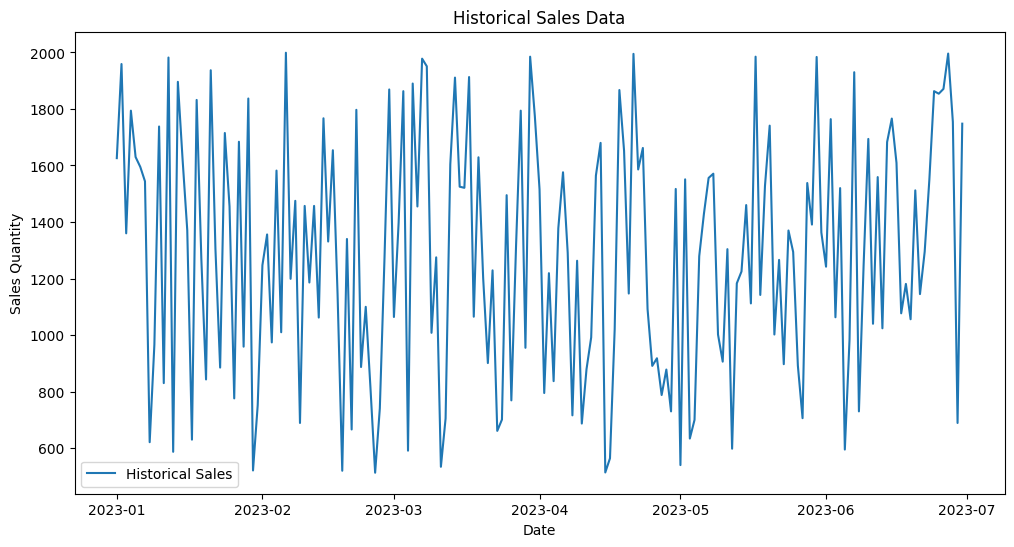

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQVrcSUuxrvxEN-uStYsjy89YNcFGlBVol2XRjtj0bhbszXJrv53yK-7cKWpEBWuiIt4aOt4XcIvh3_/pub?output=csv"

# Read the CSV from the URL, parse 'Date' column as datetime
sales_data = pd.read_csv(url, parse_dates=['Date'])

# Convert 'Date' column to datetime format
sales_data['Date'] = pd.to_datetime(sales_data['Date'])

# Set 'Date' as the index
sales_data.set_index('Date', inplace=True)

# Plot the historical sales data
plt.figure(figsize=(12, 6))
plt.plot(sales_data['SalesQuantity'], label='Historical Sales')
plt.title('Historical Sales Data')
plt.xlabel('Date')
plt.ylabel('Sales Quantity')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                 Date  SalesForecast
2023-07-01 2023-07-01    1357.738670
2023-07-02 2023-07-02    1420.553973
2023-07-03 2023-07-03    1344.442618
2023-07-04 2023-07-04    1469.376577
2023-07-05 2023-07-05    1507.361150
2023-07-06 2023-07-06    1251.863282
2023-07-07 2023-07-07    1461.179011
2023-07-08 2023-07-08    1357.738670
2023-07-09 2023-07-09    1420.553973
2023-07-10 2023-07-10    1344.442618
2023-07-11 2023-07-11    1469.376577
2023-07-12 2023-07-12    1507.361150
2023-07-13 2023-07-13    1251.863282
2023-07-14 2023-07-14    1461.179011
2023-07-15 2023-07-15    1357.738670
2023-07-16 2023-07-16    1420.553973
2023-07-17 2023-07-17    1344.442618
2023-07-18 2023-07-18    1469.376577
2023-07-19 2023-07-19    1507.361150
2023-07-20 2023-07-20    1251.863282
2023-07-21 2023-07-21    1461.179011
2023-07-22 2023-07-22    1357.738670
2023-07-23 2023-07-23    1420.553973
2023-07-24 2023-07-24    1344.442618
2023-07-25 2023-07-25    1469.376577
2023-07-26 2023-07-26    1507.361150
2

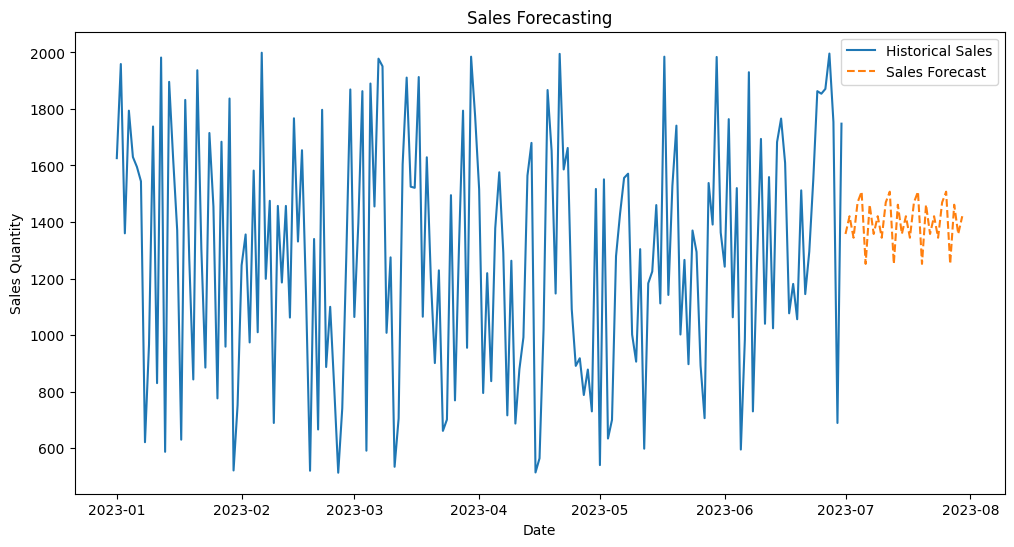

In [2]:
# Ensure 'SalesQuantity' is numeric
sales_data['SalesQuantity'] = pd.to_numeric(sales_data['SalesQuantity'], errors='coerce')

# Drop rows with missing values (if any)
sales_data = sales_data.dropna()

# Train the forecasting model using Exponential Smoothing
model = ExponentialSmoothing(sales_data['SalesQuantity'], seasonal='add', seasonal_periods=7)
fit_model = model.fit()

# Forecast sales for the next 30 days (you can adjust the forecast period)
forecast_period = 30
forecast_index = pd.date_range(sales_data.index[-1] + pd.DateOffset(1), periods=forecast_period)
forecast_values = fit_model.forecast(steps=forecast_period)

# Create a DataFrame to store the forecasted values
forecast_data = pd.DataFrame({'Date': forecast_index,'SalesForecast': forecast_values})

# Print or use forecast_data for further processing
print(forecast_data)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(sales_data['SalesQuantity'], label='Historical Sales')
plt.plot(forecast_data['Date'], forecast_data['SalesForecast'], label='Sales Forecast', linestyle='dashed')
plt.title('Sales Forecasting')
plt.xlabel('Date')
plt.ylabel('Sales Quantity')
plt.legend()
plt.show()

In [4]:
# Define a constant ratio of raw material consumption per unit of sales
raw_material_ratio = 0.2  # Adjust this based on your specific business context

# Calculate raw material requirements based on the forecasted sales
forecast_data['RawMaterialRequirement'] = forecast_data['SalesForecast'] * raw_material_ratio

# Print or use forecast_data for further processing
print(forecast_data)



                 Date  SalesForecast  RawMaterialRequirement
2023-07-01 2023-07-01    1357.738670              271.547734
2023-07-02 2023-07-02    1420.553973              284.110795
2023-07-03 2023-07-03    1344.442618              268.888524
2023-07-04 2023-07-04    1469.376577              293.875315
2023-07-05 2023-07-05    1507.361150              301.472230
2023-07-06 2023-07-06    1251.863282              250.372656
2023-07-07 2023-07-07    1461.179011              292.235802
2023-07-08 2023-07-08    1357.738670              271.547734
2023-07-09 2023-07-09    1420.553973              284.110795
2023-07-10 2023-07-10    1344.442618              268.888524
2023-07-11 2023-07-11    1469.376577              293.875315
2023-07-12 2023-07-12    1507.361150              301.472230
2023-07-13 2023-07-13    1251.863282              250.372656
2023-07-14 2023-07-14    1461.179011              292.235802
2023-07-15 2023-07-15    1357.738670              271.547734
2023-07-16 2023-07-16   

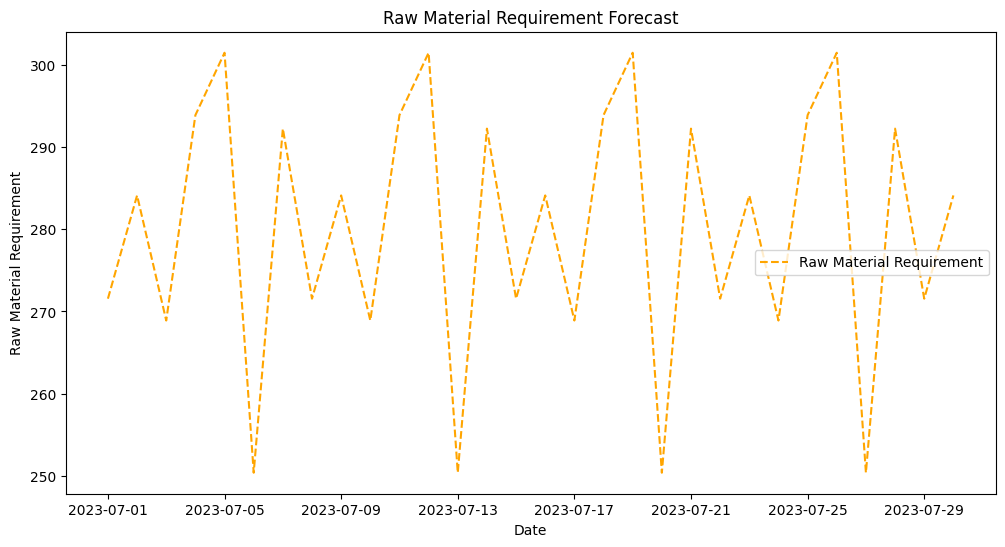

In [5]:
# Plot the raw material requirements
plt.figure(figsize=(12, 6))
plt.plot(forecast_data['Date'], forecast_data['RawMaterialRequirement'], label='Raw Material Requirement', linestyle='dashed', color='orange')
plt.title('Raw Material Requirement Forecast')
plt.xlabel('Date')
plt.ylabel('Raw Material Requirement')
plt.legend()
plt.show()